In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
from os.path import join, dirname, isdir, isfile, basename
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Pessoa_Lab = '/data/bswift-1/Pessoa_Lab'
eCON = join(Pessoa_Lab,'eCON')
EMO1 = join(Pessoa_Lab,'EMO1')

pal = sns.color_palette()
mypal = [pal[2],pal[0]]

In [3]:
uncon = np.squeeze(nib.load(join(eCON,'dataset/Group/ShockUncensored/UnconVsCon_paired/uncon_shock_anticipation_yhat_bucket.nii.gz')).get_data())
con = np.squeeze(nib.load(join(eCON,'dataset/Group/ShockUncensored/UnconVsCon_paired/con_shock_anticipation_yhat_bucket.nii.gz')).get_data())

In [6]:
ROIs = {join(eCON,'ROI_masks/ROI_analysis_mask.nii.gz'):[('Left Hippocampus',11),('Right Hippocampus',12),
                                              ('Right Dorsal Anterior Insula',18),
                                              ('Right Ventral Anterior Insula',17),
                                              ('Left BNST',15),('Right BNST',16),
                                              ('Left Habenula',13),('Right Habenula',14)],
       join(eCON,'ROI_masks/from_emoprox1/vmPFC_PCC_masks.nii.gz'):[('vmPFC',1),('PCC',2)],
       join(eCON,'ROI_masks/ROI_Amygdala.nii.gz'):[('Right Amygdala',1),
                                                   ('Left Amygdala',2)],
       join(eCON,'ROI_masks/Ezra_PAG_ROI_2mm_SNR25.nii.gz'):[('Right PAG',1),('Left PAG',2)],
       join(EMO1,'ROIs/sign25vs75_P0.001_20vox_mask.nii.gz'):[('Right Amygdala (Version 3)',28),
                                                              ('PAG (Version 3)',44),
                                                              ('Anterior Insula (functional)',10)],
       join(EMO1,'ROIs/PCC_masks.nii.gz'):[('PCC (Version 2)',1)],
       join(eCON,'ROI_masks/from_emoprox1/PAG_Amygdala.nii.gz'):[('PAG (Version 2)',1),
                                                                 ('Right Amygdala (Version 2)',2)],
       join(eCON,'ROI_masks/Amygdala_CeME_R.nii.gz'):[('Right Central Amgdala',1)],
       join(eCON,'ROI_masks/Amygdala_CeME_L.nii.gz'):[('Left Central Amygdala',1)],
       join(EMO1,'ROIs/proximity25vs75_mask.nii.gz'):[('Mid-Cingulate',13)],
       join(eCON,'ROI_masks/anterior_cingulate_Neurosynth_mask.nii.gz'):[('Anterior Cingulate',1)],
       join(eCON,'ROI_masks/from_emoprox1/emoprox1_Deen_L-dAI.nii.gz'):[('Left Dorsal Anterior Insula',1)],
       join(eCON,'ROI_masks/from_emoprox1/emoprox1_Deen_L-vAI.nii.gz'):[('Left Ventral Anterior Insula',1)],
       join(eCON,'ROI_masks/Deen_InsulaClusters_MNI_FSL/InsulaCluster_K3_R-PI_GM.nii.gz'):[('Right Posterior Insula',1)],
       join(eCON,'ROI_masks/Deen_InsulaClusters_MNI_FSL/InsulaCluster_K3_L-PI_GM.nii.gz'):[('Left Posterior Insula',1)],}

In [7]:
df = pd.DataFrame(columns=['ROI','Group','Time(s)','TR','Response'])
MNI_gm = nib.load(join(Pessoa_Lab,'share/templates/MNI152_T1_2mm_brain_GM_02182017.nii.gz')).get_data()
rois = []
for maskpath in ROIs.keys():
    mask = nib.load(maskpath).get_data()
    for group, kind in zip(['Uncontrol','Control'],[uncon,con]):
        betas = kind
        for roi in ROIs[maskpath]:
            name, i = roi
            resp = betas[(mask==i) & (MNI_gm == 1)].mean(axis=0)
            tmp=pd.DataFrame([(np.arange(resp.shape[0])-6)*1.25, np.arange(resp.shape[0]), resp],
                             index=['Time(s)','TR','Response']).T
            tmp['Group'] = group; tmp['ROI']= name
            df = pd.concat([df,tmp],axis=0)

            if name not in rois:
                rois.append(name)

/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [9]:
df.shape

(1008, 5)

In [10]:
approach_resp_indx = dict()
for roi in rois:
    approach_resp_indx[roi] = np.sum(df[(df['ROI']==roi) & (df['TR'].isin([2,3,4,5,6,7])) & (df['Group']=='Uncontrol')]['Response'].values 
                                     - df[(df['ROI']==roi) & (df['TR'].isin([2,3,4,5,6,7])) & (df['Group']=='Control')]['Response'].values)

In [11]:
approach_resp_indx

{'Left Hippocampus': 0.029089656774885952,
 'Right Hippocampus': 0.010010026395320892,
 'Right Dorsal Anterior Insula': -0.12232252024114132,
 'Right Ventral Anterior Insula': -0.14833041094243526,
 'Left BNST': -0.14532133867032826,
 'Right BNST': -0.27072248654440045,
 'Left Habenula': -0.23666704981587827,
 'Right Habenula': -0.1685131441336125,
 'vmPFC': -0.04142449051141739,
 'PCC': -0.22916077822446823,
 'Right Amygdala': 0.20373347091663163,
 'Left Amygdala': 0.13846403546631336,
 'Right PAG': -0.0018438026309013367,
 'Left PAG': 0.05141377029940486,
 'Right Amygdala (Version 3)': 0.15828222315758467,
 'PAG (Version 3)': -0.07731703110039234,
 'Anterior Insula (functional)': -0.13176435232162476,
 'PCC (Version 2)': -0.1626402735710144,
 'PAG (Version 2)': -0.0031864577904343605,
 'Right Amygdala (Version 2)': 0.21283027925528586,
 'Right Central Amgdala': 0.03896255046129227,
 'Left Central Amygdala': 0.12410867214202881,
 'Mid-Cingulate': -0.10895018605515361,
 'Anterior Cingu

/home/climbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


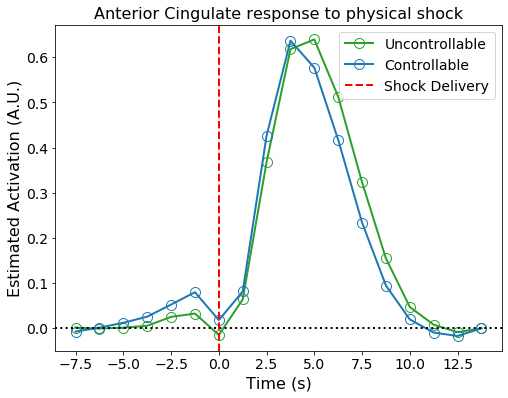

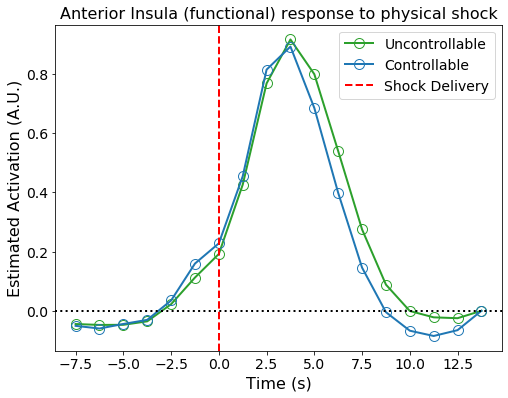

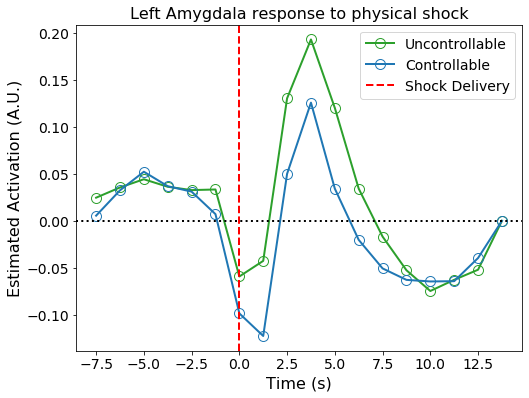

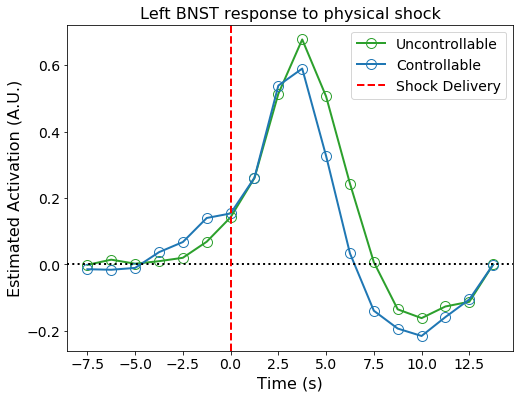

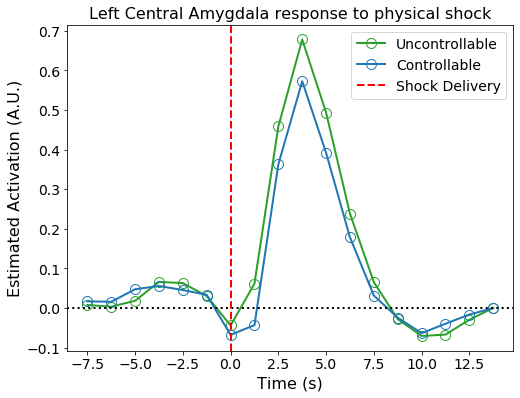

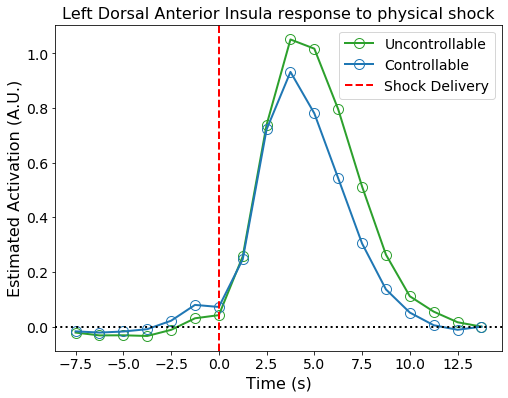

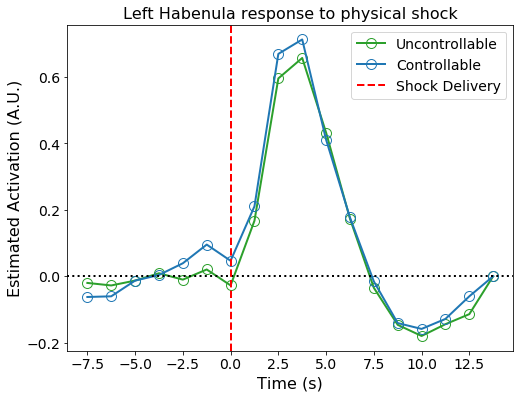

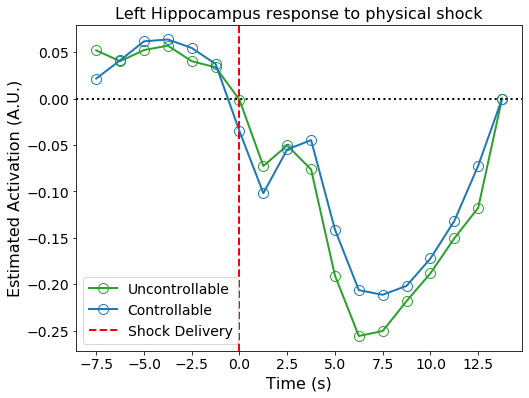

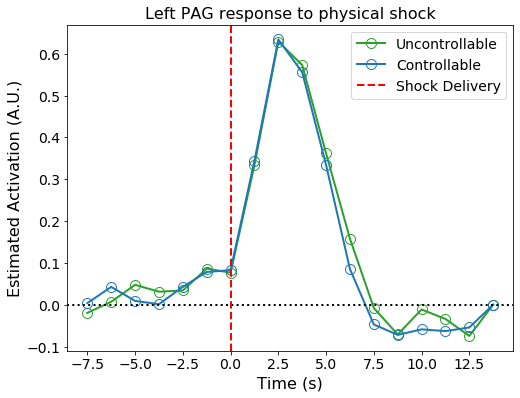

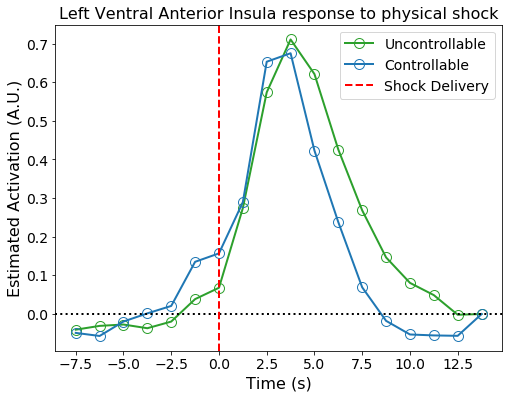

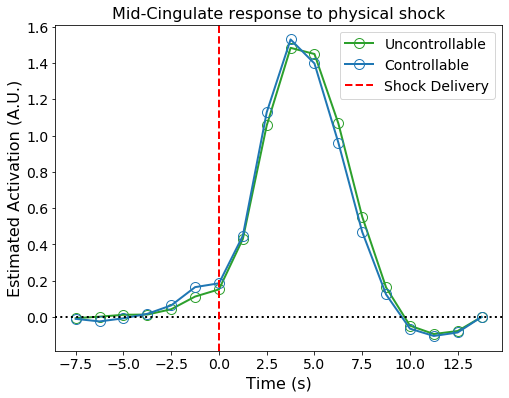

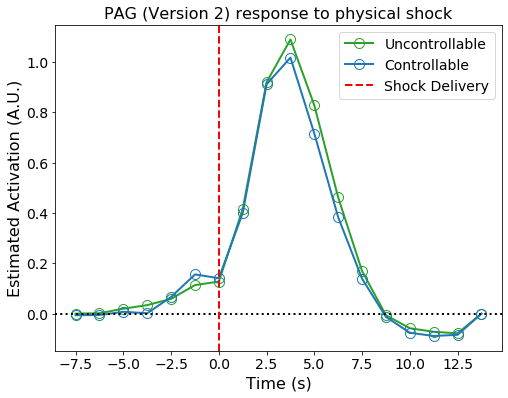

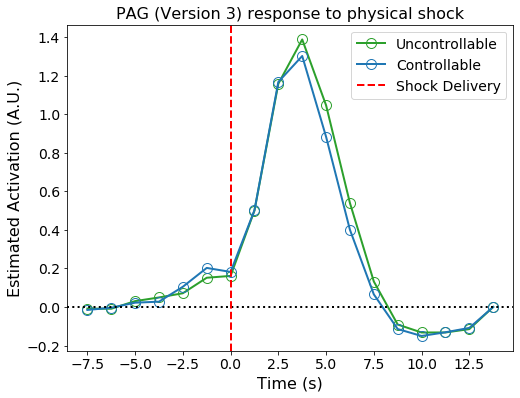

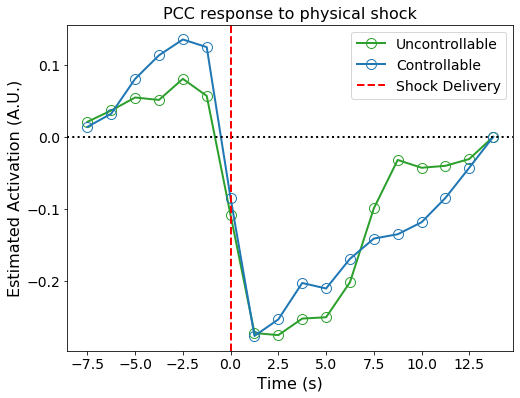

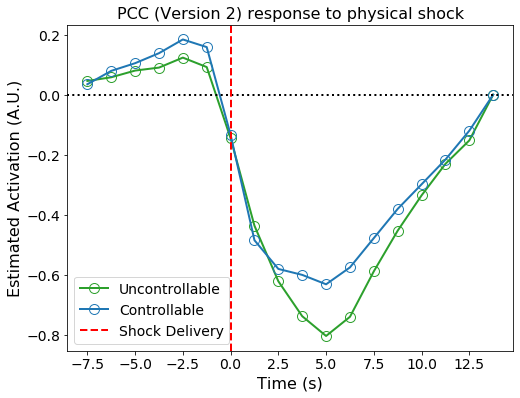

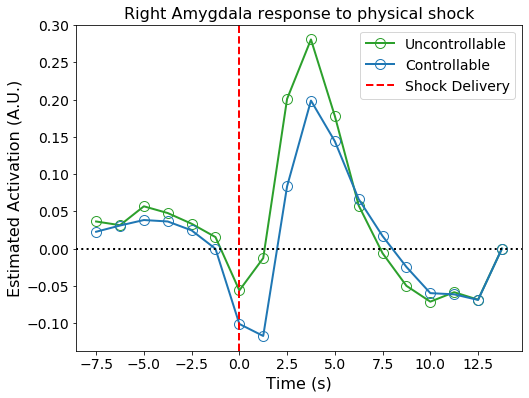

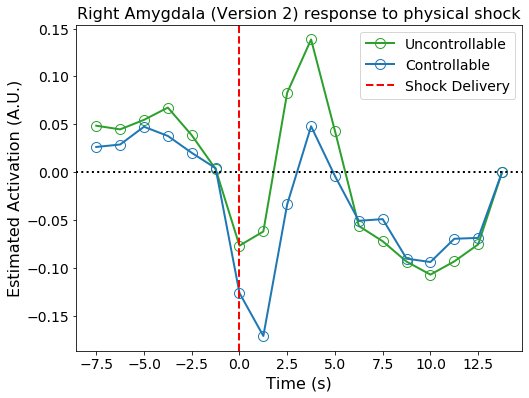

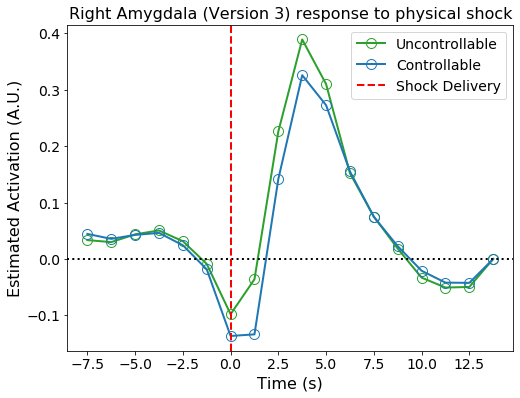

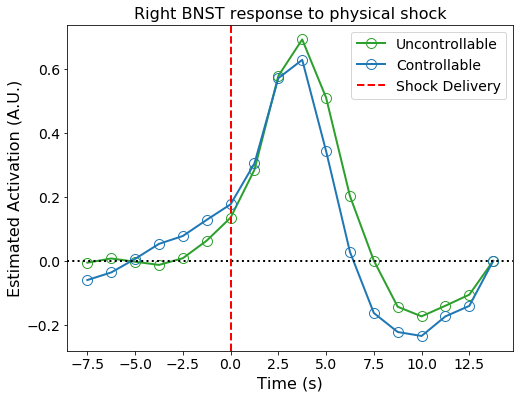

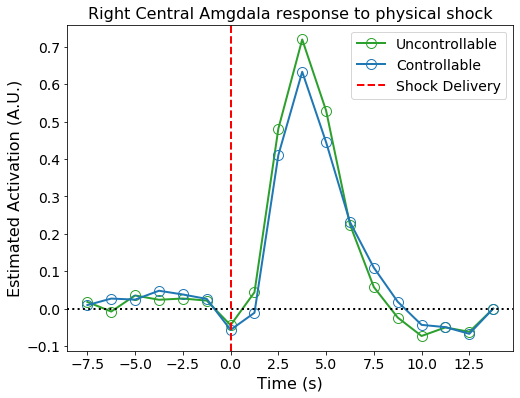

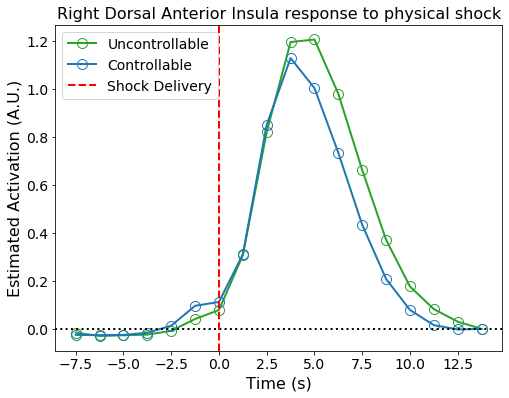

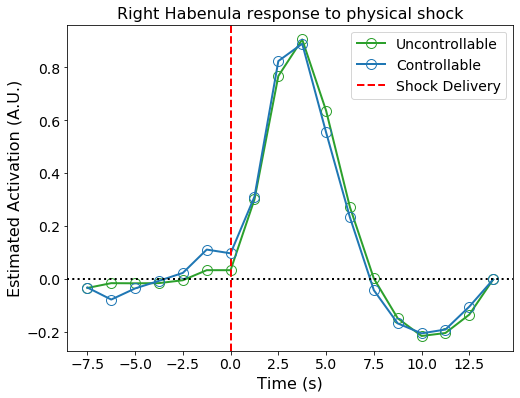

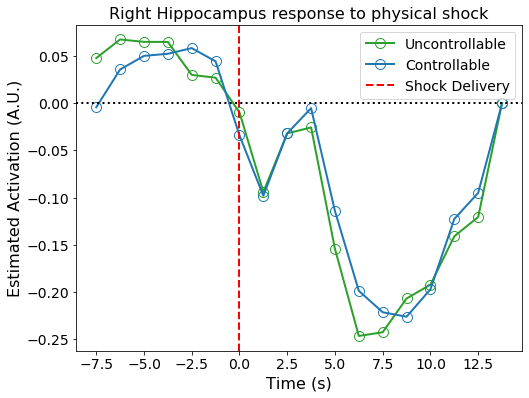

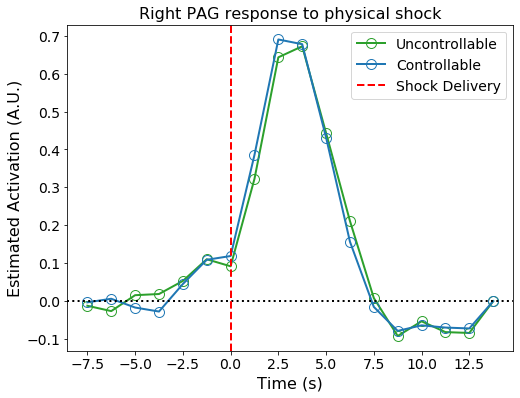

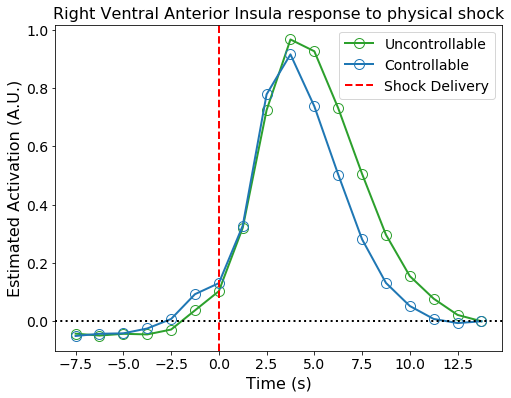

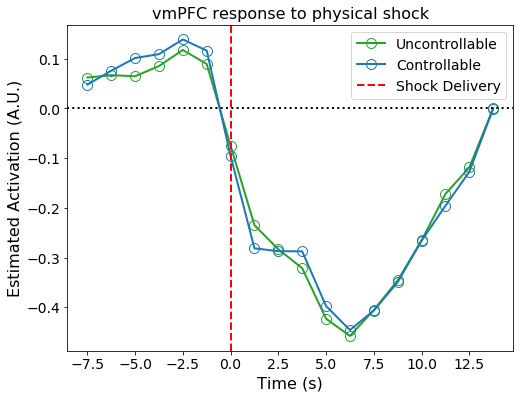

In [18]:
for roi in sorted(rois):
    time = df['Time(s)'].unique()
    
    uncon_resp = df['Response'][(df['Group'] == 'Uncontrol') & (df['ROI'] == roi)].values
    plt.figure(figsize =(8,6))
    plt.plot(time,uncon_resp,linestyle='-',linewidth=2,marker='o',
             markersize=10,color=mypal[0],label='Uncontrollable',mfc = 'none')
    
    con_resp = df['Response'][(df['Group'] == 'Control') & (df['ROI'] == roi)].values
    plt.plot(time,con_resp,linestyle='-',linewidth=2,marker='o',
             markersize=10,color=mypal[1],label='Controllable',mfc='none')
    plt.axhline(0,linestyle=':',color='black',linewidth = 2)
    plt.axvline(0,linestyle='--',color='red',linewidth = 2,label='Shock Delivery')
    plt.legend(fontsize=14)
    plt.xticks((np.arange(resp.shape[0])[::2]-6)*1.25)
    plt.tick_params(labelsize=14)
    plt.xlabel('Time (s)',fontdict=dict(size=16))
    plt.ylabel('Estimated Activation (A.U.)',fontdict=dict(size=16))
    plt.title('{} response to physical shock'.format(roi),fontdict=dict(size=16))
    #plt.savefig('figures/{}_shockAnticipation.png'.format(roi),dpi=300)

In [16]:
rois=['Right Amygdala','Left Amygdala','Right BNST','Left BNST']